In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing all the datasets
ass = pd.read_csv("ass.csv")
cum = pd.read_csv("cum.csv")
dick = pd.read_csv("dick.csv")
faggot = pd.read_csv("faggot.csv")
fuck = pd.read_csv("fuck.csv")
jew = pd.read_csv("jew.csv")
nigger = pd.read_csv("nigger.csv")
normal = pd.read_csv("normal.csv")
tits = pd.read_csv("tits.csv")
pussy = pd.read_csv("pussy.csv")

In [3]:
#cancatenating the datasets
df = pd.concat([ass,cum,dick,faggot,fuck,jew,nigger,normal,tits,pussy])
df.shape

(1110, 4)

In [4]:
#shuffle the dataframe
df = df.sample(frac=1)
df.head()

,Datetime,Tweet Id,Text,Username
49,2023-04-15 14:49:01,1647250681785352192,@babessingle I think it's one of the best ever...,nealm68
79,2023-04-15 14:52:31,1647251561171546112,"@PR3GAM3_FR3AK ❝ I still have time ,\n\nAlso I...",UR_BEGGIN__SLUT
8,2023-04-15 13:38:18,1647232883713515520,@cooldjgaba @magxi500 @mumslast Amen 😆😆😆😆,ThatNigger85
7,2023-04-15 14:52:31,1647251561922408449,@JacketsInsider @BlueJacketsNHL Jarmo needs to...,jk2512131
78,2023-04-15 14:52:31,1647251561196789760,@_BeautyisNAE it b them throwin they head back...,thejlamia


In [5]:
df.isna().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [6]:
X = df.Text
X

49     @babessingle I think it's one of the best ever...
79     @PR3GAM3_FR3AK ❝ I still have time ,\n\nAlso I...
8              @cooldjgaba @magxi500 @mumslast Amen 😆😆😆😆
7      @JacketsInsider @BlueJacketsNHL Jarmo needs to...
78     @_BeautyisNAE it b them throwin they head back...
                             ...                        
42     @UsingCigarettes @ass_beaters I guess this hea...
341                                        def toontown.
32     @nini_isdead garlic called me a nigger in dms ...
391    @HutchesonEd @badmanfree @bennyjohnson That's ...
65                          i have got to dress sluttier
Name: Text, Length: 1110, dtype: object

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
def tokenizer(text):
    text = re.sub('[^a-zA-Z0-9\s]', '', text).lower()
    tokens = text.split()
    return tokens
tf = TfidfVectorizer(tokenizer=tokenizer)
tweet_text_vector = tf.fit_transform(X)
tweet_text_vector

<1110x5576 sparse matrix of type '<class 'numpy.float64'>'
	with 16051 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(tweet_text_vector)
labels = kmean.predict(tweet_text_vector)
labels

array([2, 2, 0, ..., 1, 0, 2])

In [9]:
print(np.unique(labels, return_counts=True))

(array([0, 1, 2]), array([529, 407, 174], dtype=int64))


In [10]:
df['labels'] = labels 
df.head()

,Datetime,Tweet Id,Text,Username,labels
49,2023-04-15 14:49:01,1647250681785352192,@babessingle I think it's one of the best ever...,nealm68,2
79,2023-04-15 14:52:31,1647251561171546112,"@PR3GAM3_FR3AK ❝ I still have time ,\n\nAlso I...",UR_BEGGIN__SLUT,2
8,2023-04-15 13:38:18,1647232883713515520,@cooldjgaba @magxi500 @mumslast Amen 😆😆😆😆,ThatNigger85,0
7,2023-04-15 14:52:31,1647251561922408449,@JacketsInsider @BlueJacketsNHL Jarmo needs to...,jk2512131,1
78,2023-04-15 14:52:31,1647251561196789760,@_BeautyisNAE it b them throwin they head back...,thejlamia,0


In [11]:
df = df.drop(['Datetime','Tweet Id','Username'],axis=1)
df.head()

,Text,labels
49,@babessingle I think it's one of the best ever...,2
79,"@PR3GAM3_FR3AK ❝ I still have time ,\n\nAlso I...",2
8,@cooldjgaba @magxi500 @mumslast Amen 😆😆😆😆,0
7,@JacketsInsider @BlueJacketsNHL Jarmo needs to...,1
78,@_BeautyisNAE it b them throwin they head back...,0


In [12]:
print(df[df['labels']==0].tail(30))

                                                  Text  labels
64                                 @ConnCFC U assisted       0
14   @catturd2 💩💩💩💩 💩💩💩💩💩💩\nDon’t you dare lump us ...       0
2    My massive morning wood is out, it’s so hard a...       0
440  @Everton Good tactical change. Iwobi central m...       0
327  Duke Bridges Barlow Dunlop #电话卡 #QQ号 https://t...       0
203                            @hermosavidara Betullll       0
122  @RobGoncopski @rjolli007 🤣😂 Me waitin on the L...       0
319           @KEdge23 Tories. https://t.co/dqFkUIqufF       0
345  LEVEL 42『Children Say』 (HQ) \n📺https://t.co/sm...       0
406  @S_e_r_g_i_o_589 @SologenicNFT $BEAST - $SGB S...       0
2    Ward Bloor Bart Bryan Troy Alcott Lesley Henle...       0
45      @Anthony84422184 Naw he looks deflated as fuck       0
3    today im taking my nigger out to eat https://t...       0
15   @kinky_horror Happy Splatterday Mourning. Robo...       0
22   @GeorgeWept @proftinkerbell @DeSantisWarRoom @... 

In [13]:
print(df[df['labels']==1].tail(30))

                                                  Text  labels
35   Hello, this is HaalandNigger’s mother. I opene...       1
7    Jews and the Myth of Tolerance in Islamic Spai...       1
133  Brighton deserve to win and keep Liverpool out...       1
11   Time for Christians and Jews to move out of Mi...       1
82   @Bison716 @brianstelter He's going to monetize...       1
59   Yup. Lots of high grades doesn't *prove* high ...       1
36   @CarmineSabia @Jim_Jordan When republicans say...       1
93   @ToS_Respecter UGH. I’ve drunk literal piss an...       1
74   There's nothing more satisfying than calling s...       1
360  He dropped this without context liek what is h...       1
44   @bunnymi1k @KaratoriST @HaliHareBun @d_marasi ...       1
99   @JFKSalone No matter how much man tries to be ...       1
13   @london4keeps @AsafZilka @abierkhatib Actually...       1
171  Why would it be chances of snow on Tuesday thi...       1
91   Home is where the heart is. You might have fou... 

In [14]:
print(df[df['labels']==2].tail(30))

                                                  Text  labels
13   that used to happen with chaeya too sometimes ...       2
83   This is what middle aged Jews do with younger ...       2
146  @HyperR6S I play 4:3 with widescreen letterbox...       2
60              Now i wait for the cast ruveal for AS8       2
28   Don’t take my tweets serious, I be bored. This...       2
100  @BeastsMma I wouldn’t be proud with that flag ...       2
62   @Mapscientist1 I love how people think that wh...       2
448  @ChambersUtd Swear you did law. What do you do...       2
88   the way I just be telling people the wrong shi...       2
26   @theliamnissan I bet her dick is bigger than his.       2
18   @Nigger_wut @MrBlackOG I believe, he wouldn't ...       2
295  @RufaroRufaro7 @worldofreel 😂😂why did I even a...       2
21   @SahilB_11 I agree on what you point out about...       2
66                                          i love him       2
95                        @OfficialMinks I dont get it 

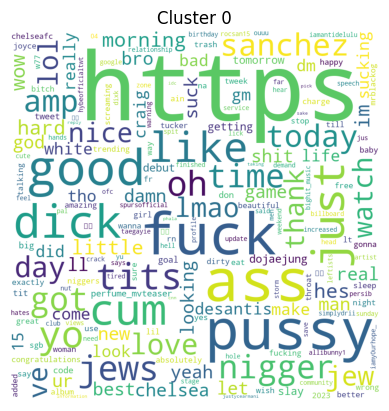

In [15]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

def plot_word_cloud(cluster_no):
    cv = CountVectorizer(stop_words='english')
    cluster_data = [i for i in df.Text[df['labels']==cluster_no]]
    words = cv.fit_transform(cluster_data)
    sum_words = words.sum(axis=0)
    word_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]
    word_freq = dict(sorted(word_freq, key = lambda x: x[1], reverse = True))
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
    wordcloud.generate_from_frequencies(word_freq)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Cluster " + str(cluster_no))
    plt.show()

plot_word_cloud(0)

We can observe that words like 'jews', 'ni__er', 'f__k' appear frequently. Hence this can belong to the hatespeech category

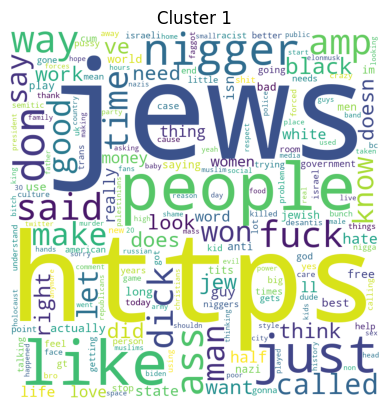

In [16]:
plot_word_cloud(1)

We observe that words like 'p__sy', 'd__k', 't__s' appear frequently. Hence this can beloong to inappropriate language section

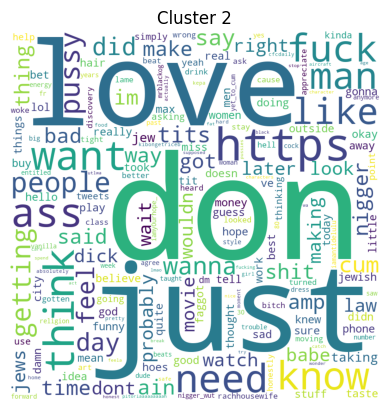

In [17]:
plot_word_cloud(2)

We observe that regular words appear very frequently. Hence this can be the normal category.

In [18]:
label_dict = {0:"Hate Speech", 1:"Inappropriate", 2:"Normal"}

Now to create the classification model

In [19]:
from sklearn.model_selection import train_test_split as tts

X = df['Text']
y = df['labels']

iptrain, iptest, ytrain, ytest = tts(X,y,test_size=0.2,random_state=42)

In [20]:
cv = CountVectorizer(stop_words='english')
Xtrain = cv.fit_transform(iptrain)
Xtest = cv.transform(iptest)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def model(model_name):
    x = model_name()
    x.fit(Xtrain,ytrain)
    print(model_name," ")
    print("Train score: ", x.score(Xtrain,ytrain))
    print("Test score: ", x.score(Xtest,ytest))

model_list = [RandomForestClassifier, LogisticRegression, SVC]
for i in model_list:
    model(i)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>  
Train score:  0.9988738738738738
Test score:  0.6171171171171171
<class 'sklearn.linear_model._logistic.LogisticRegression'>  
Train score:  0.9887387387387387
Test score:  0.6396396396396397
<class 'sklearn.svm._classes.SVC'>  
Train score:  0.8952702702702703
Test score:  0.6081081081081081


Logistic Regression gives the best overall accuracy

In [23]:
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
pred = lr.predict(Xtest)
cm = confusion_matrix(pred,ytest)
cm

array([[99, 32, 23],
       [12, 38, 10],
       [ 0,  3,  5]], dtype=int64)

In [24]:
import pickle
with open('twitter.pkl','wb') as f:
    pickle.dump(cv,f)
    pickle.dump(lr,f)